In [22]:
import pandas as pd
pd.set_option('display.max_column',30) #最大展示列
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # seems to be changing the background color of the plot

from pylab import rcParams ## matplotlib
rcParams['figure.figsize'] = 12,8

In [20]:
train = pd.read_csv('data/first_round_training_data.csv')[['Parameter'+str(i) for i in range(1,11)]+['Quality_label']]
test = pd.read_csv('data/first_round_testing_data.csv')

In [31]:
train.head(100)

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Quality_label,label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,Pass,3
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail,4
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,Fail,4
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail,4
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail,4
5,0.004062,14.556483,0.786945,0.010545,0.000525,0.001623,2286.523413,0.035407,0.593081,1.010385,Good,2
6,0.438449,1.232559,2.882699,0.610757,1.600654,0.464037,0.600827,17.850021,0.051850,0.010192,Good,2
7,48159.917401,0.002987,14.863813,0.063287,1.434060,0.314162,0.600827,17.850021,0.051850,0.010192,Good,2
8,1.456601,52.381578,20.625283,366.074831,1.434060,0.258497,0.600827,17.850021,0.051850,0.010192,Pass,3
9,0.000109,4.784654,31.916672,20.672388,1.284806,0.175007,0.600827,17.850021,0.051850,0.010192,Good,2


# Label Distribution

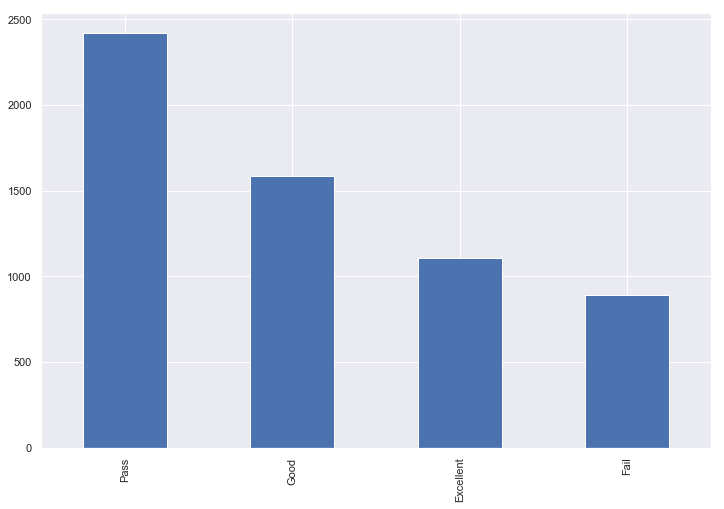

In [27]:
train['Quality_label'].value_counts().plot(kind='bar')

In [29]:
train['label'] = train['Quality_label'].map({
    'Excellent':1,
    'Good':2,
    'Pass':3,
    'Fail':4
})

In [32]:
train.describe()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,label
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000
mean,485.198954,1.952379e+03,406.348529,189.205842,5.868163e+00,5.598597e+00,272.300821,22.133231,5.823664e+04,35.902066,2.515667
std,11401.971393,5.419588e+04,12018.898941,2621.779049,8.631865e+00,7.686898e+00,2027.460514,302.172768,3.173068e+06,101.629348,0.957205
min,0.000003,1.683797e-07,0.000005,0.000002,9.985942e-07,9.810610e-07,0.000624,0.023699,3.962831e-04,0.001024,1.000000
25%,0.088221,4.765771e-02,0.102304,0.118314,7.416296e-01,3.818154e-01,0.152059,0.035407,5.930812e-01,0.101478,2.000000
50%,1.050304,9.405962e-01,1.044908,1.068467,2.225808e+00,2.684398e+00,0.600827,2.931083,5.930812e-01,0.727611,3.000000
75%,10.938565,1.569199e+01,10.665397,9.902064,6.680183e+00,7.117767e+00,2.374035,17.850021,6.783967e+00,13.969790,3.000000
max,713682.207601,3.034568e+06,864530.632179,139767.494732,8.367195e+01,4.117541e+01,35698.591553,20086.397753,1.738083e+08,517.197610,4.000000


# Correlation


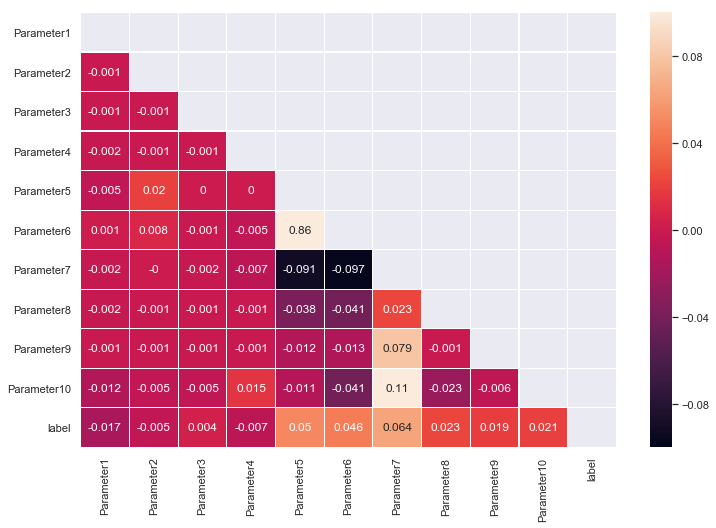

In [42]:
plt.figure(figsize=(12,8))
correlation = train.corr()
mask = np.zeros_like(correlation) # 返回来一个给定形状和类型的用0填充的数组
mask[np.triu_indices_from(mask)] = True #np.triu_indices_from(mask)返回矩阵上三角形的索引
sns.heatmap(data=correlation.round(3),mask=mask,vmin=-0.1,vmax=0.1,annot=True,linewidths=.1)

# 判断是否是类别变量

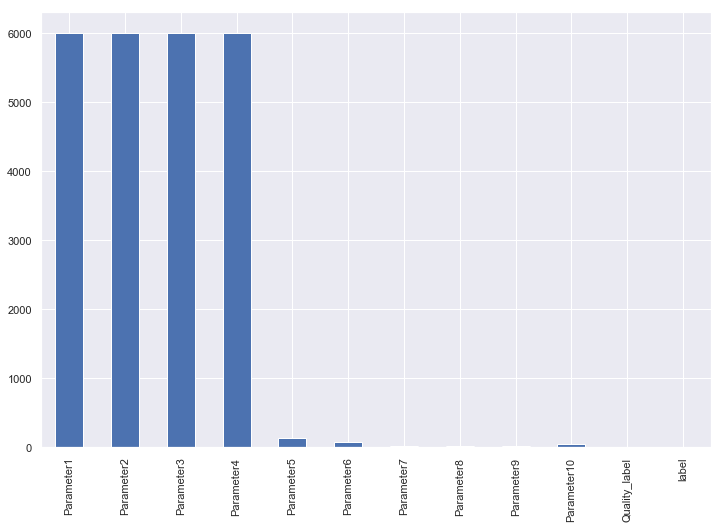

In [45]:
train.nunique().plot(kind='bar')

总结：Parameter1~4数值差异性大，方差大，不适宜作为特征参数

## Parameter与label

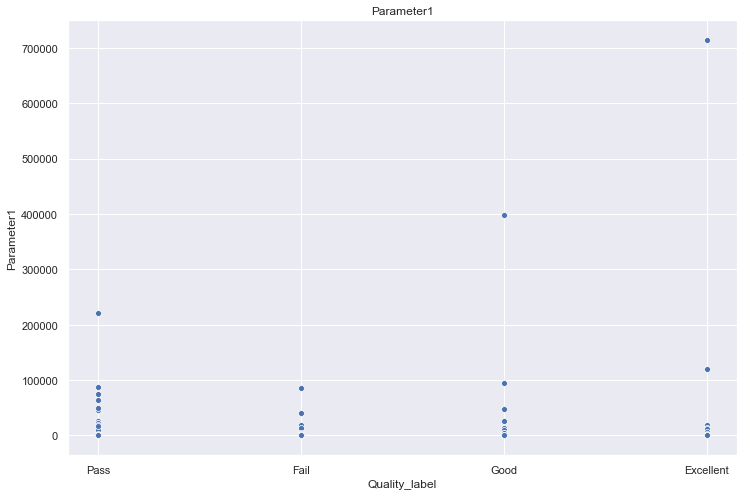

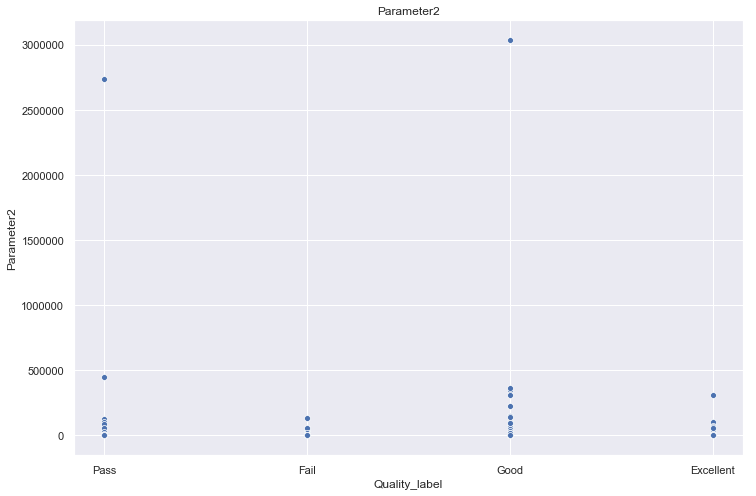

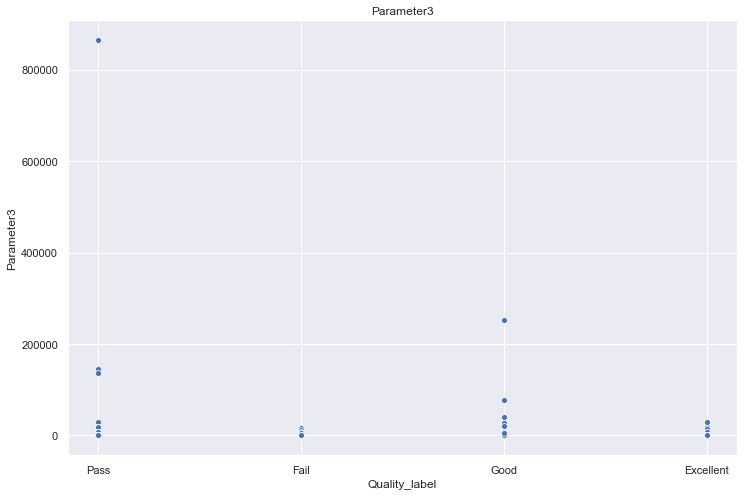

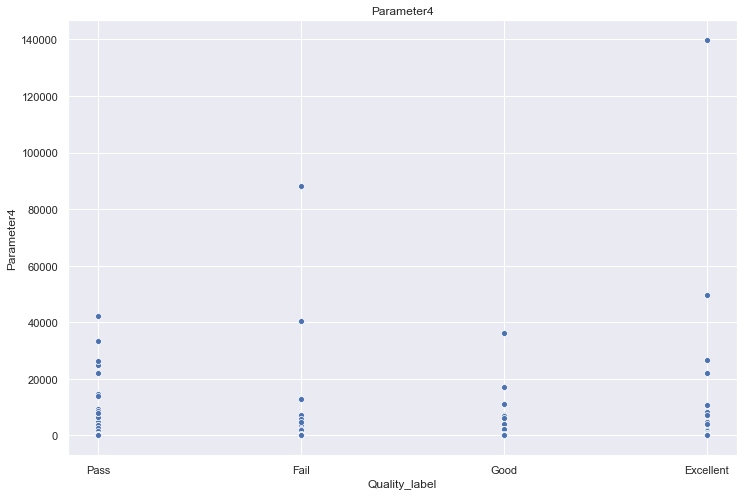

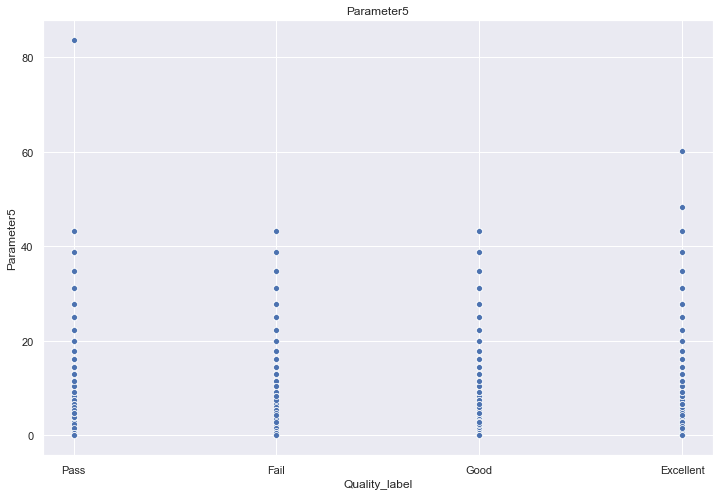

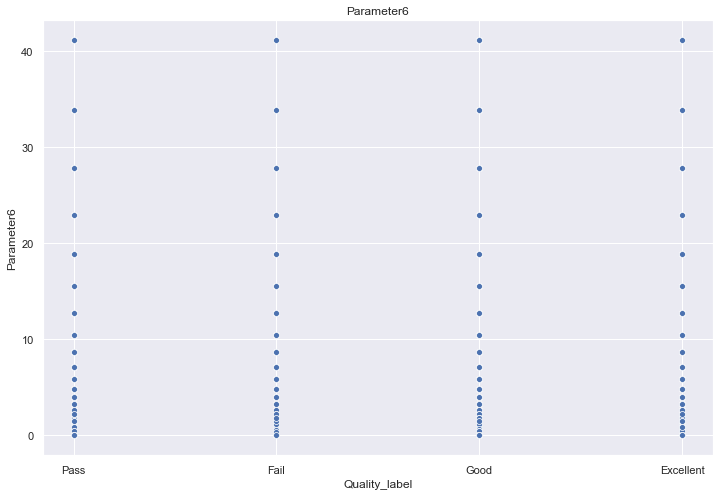

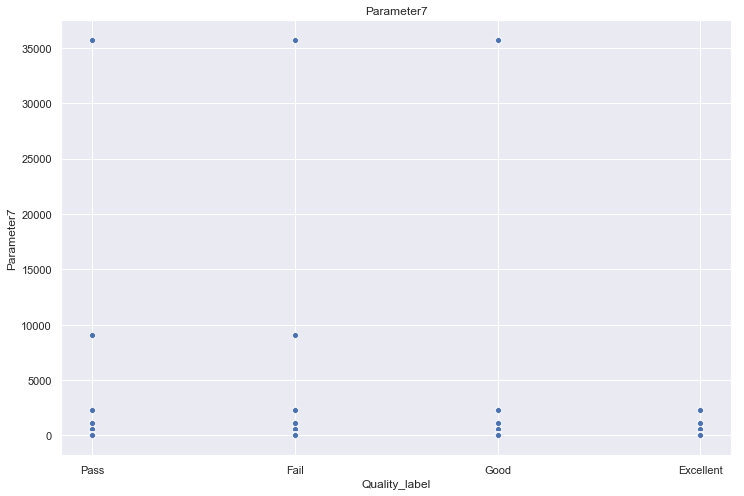

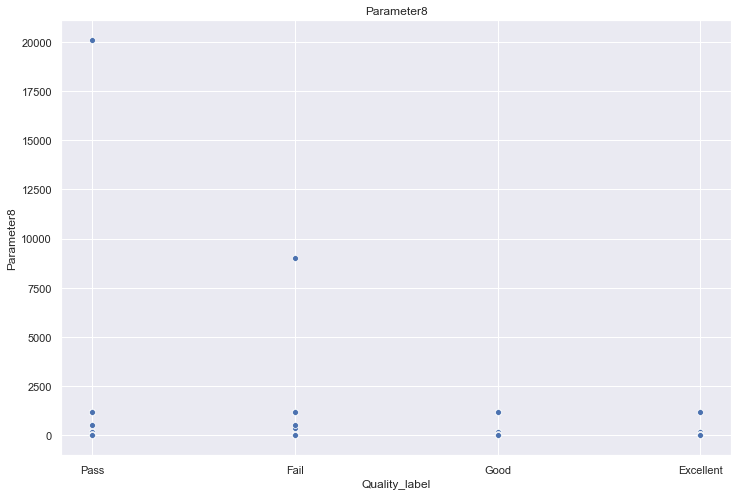

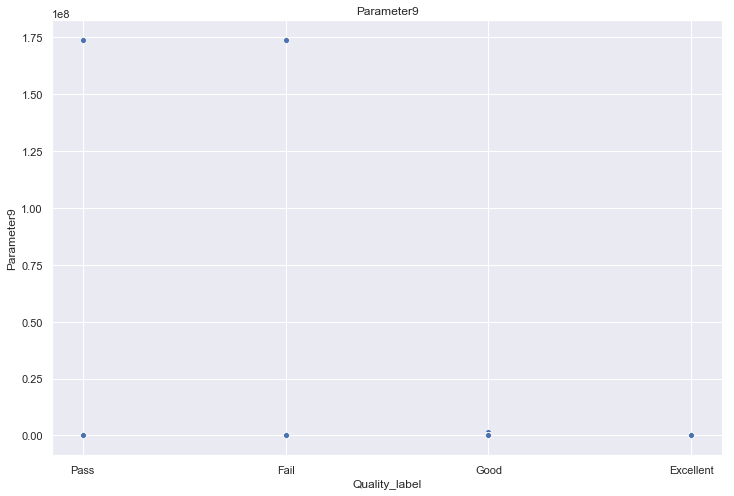

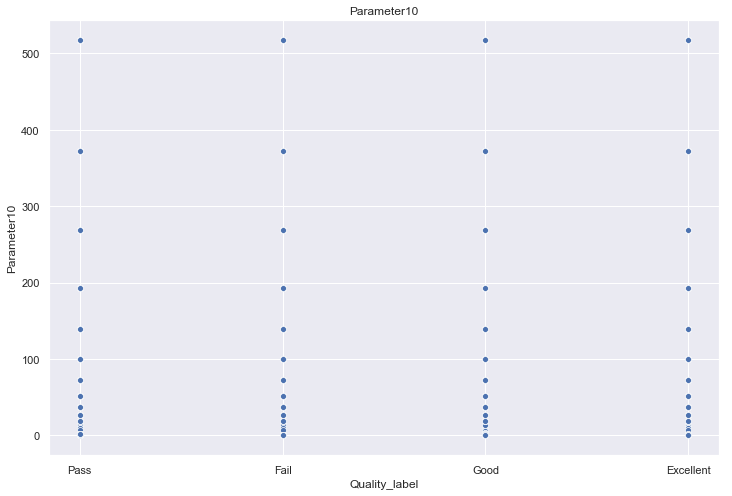

In [49]:
for i in ['Parameter' + str(i) for i in range(1,11)]:
    sns.scatterplot(x='Quality_label',y=i,data=train)
    plt.title(i)
    plt.show()

# 训练集与测试及分布比较

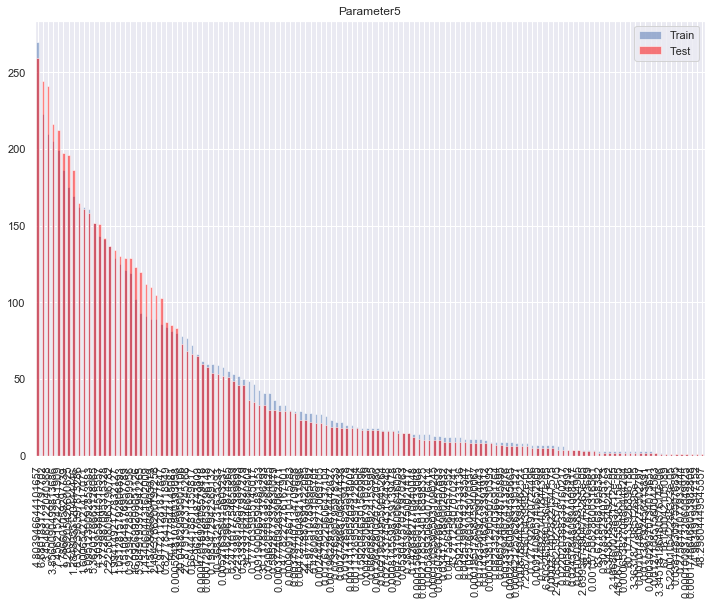

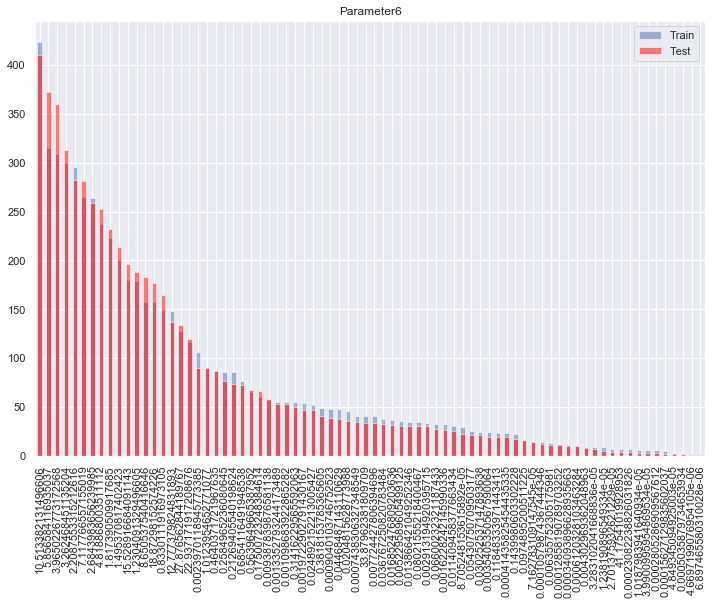

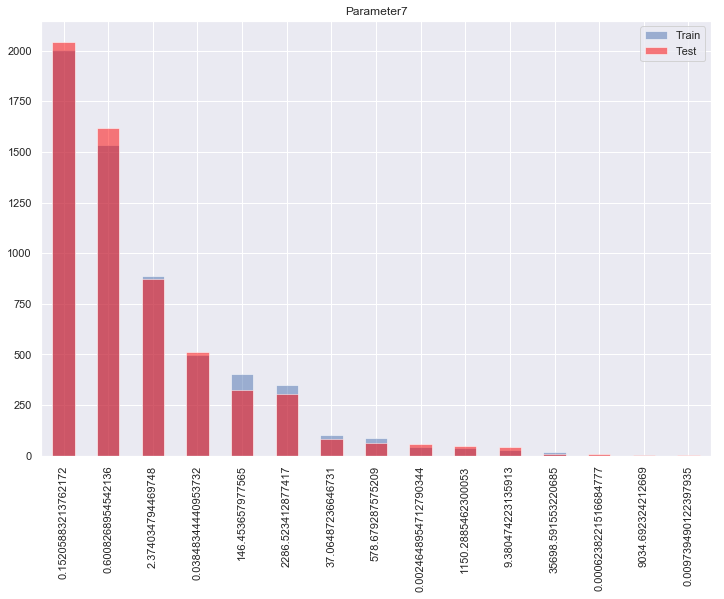

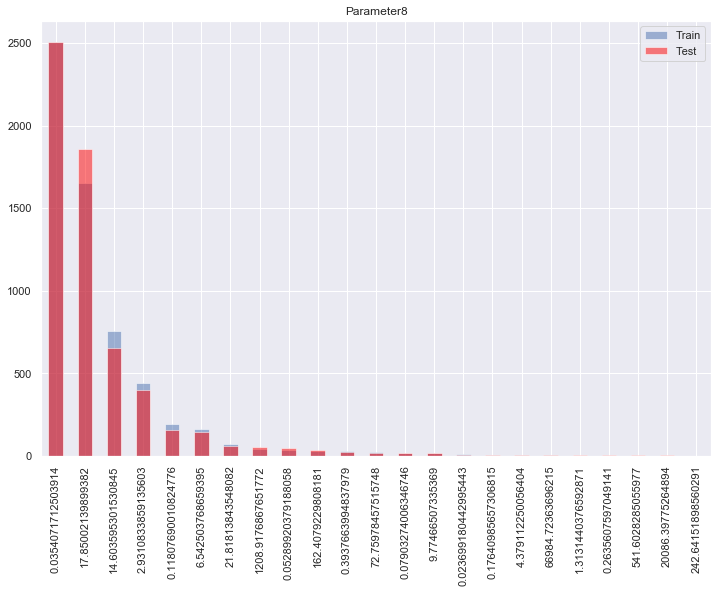

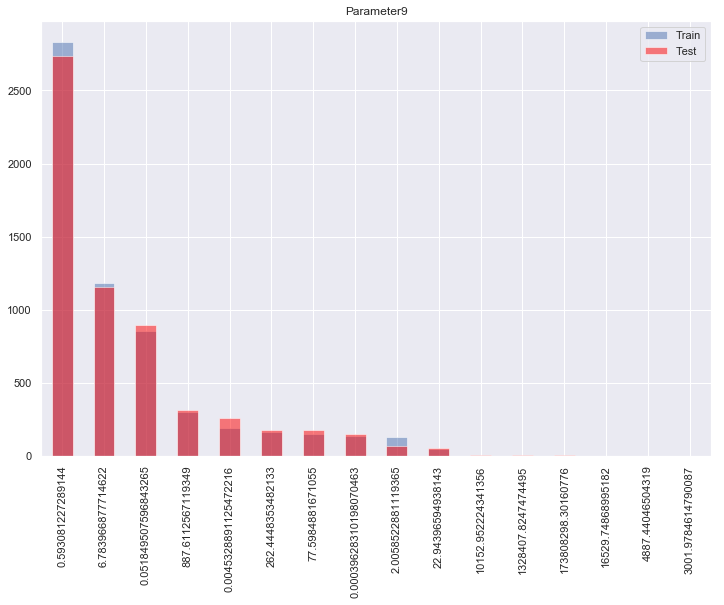

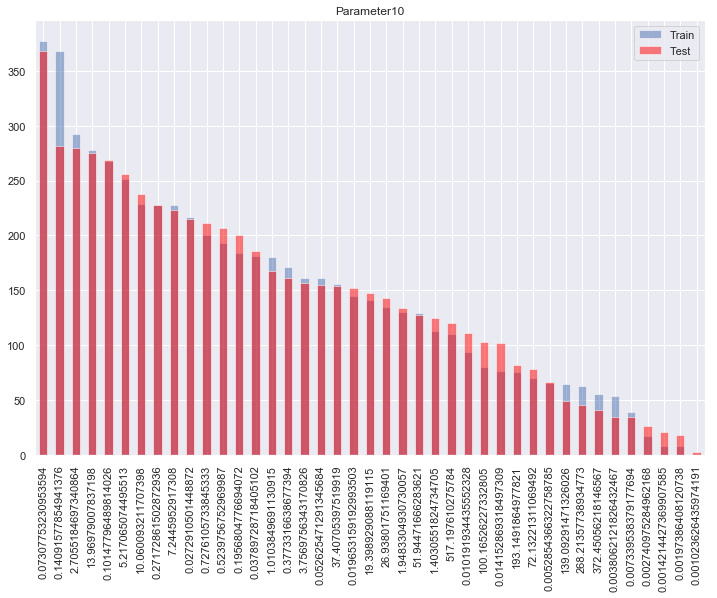

In [53]:
for i in ['Parameter' + str(i) for i in range(5,11)]:
    train[i].value_counts().plot(kind='bar',alpha=0.5,label='Train')
    test[i].value_counts().plot(kind='bar',alpha=0.5,color='red',label='Test')
    plt.title(i)
    plt.legend()
    plt.show()

In [ ]:
for i in ['Parameter' + str(i) for i in range(1,11)]:
    sns.kdeplot(train[i],label='Train',alpha=0.8)
    sns.kdeplot(test[i],label='Test',alpha=0.8)
    plt.title(i)
    plt.show()

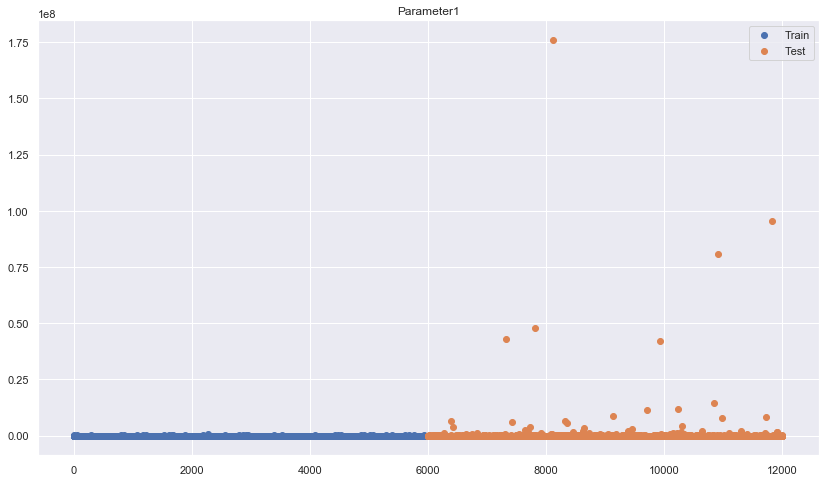

(6000, 11)


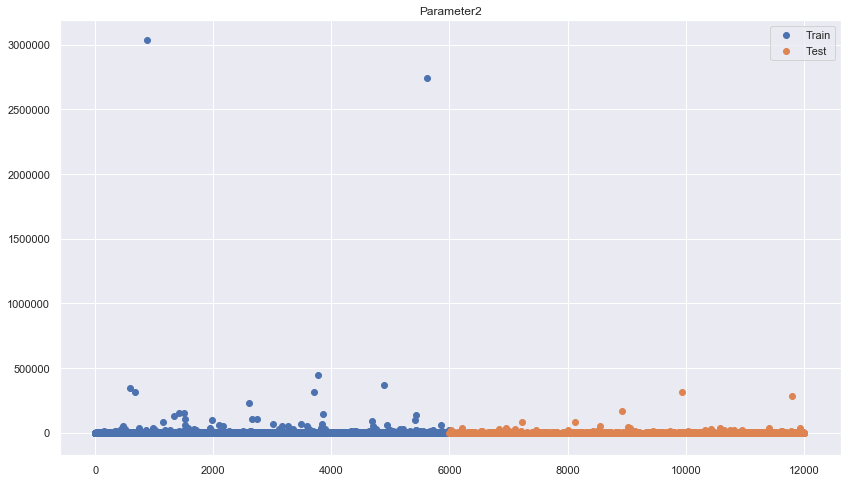

(6000, 11)


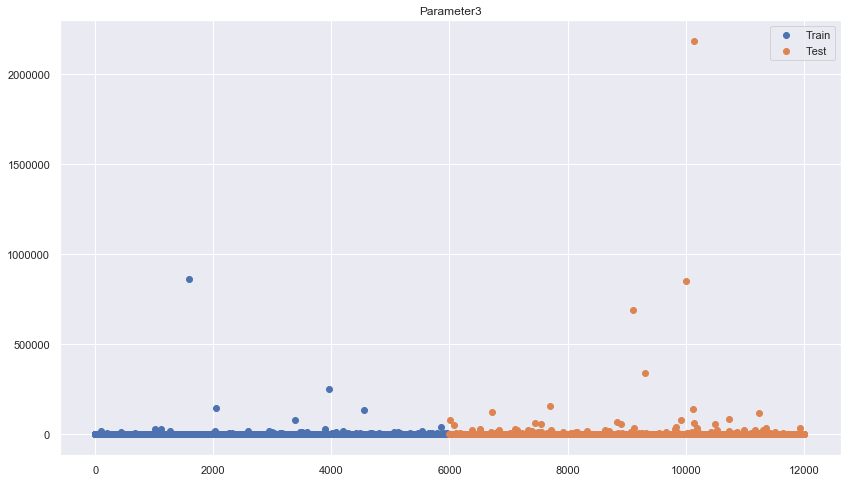

(6000, 11)


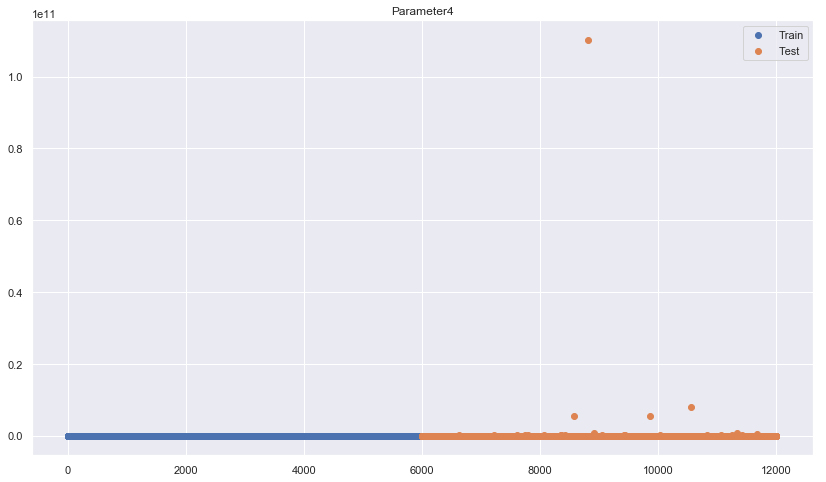

(6000, 11)


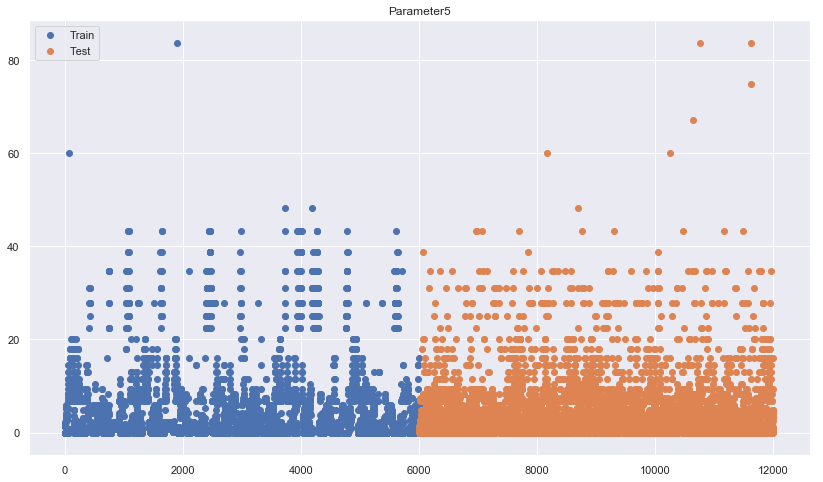

(6000, 11)


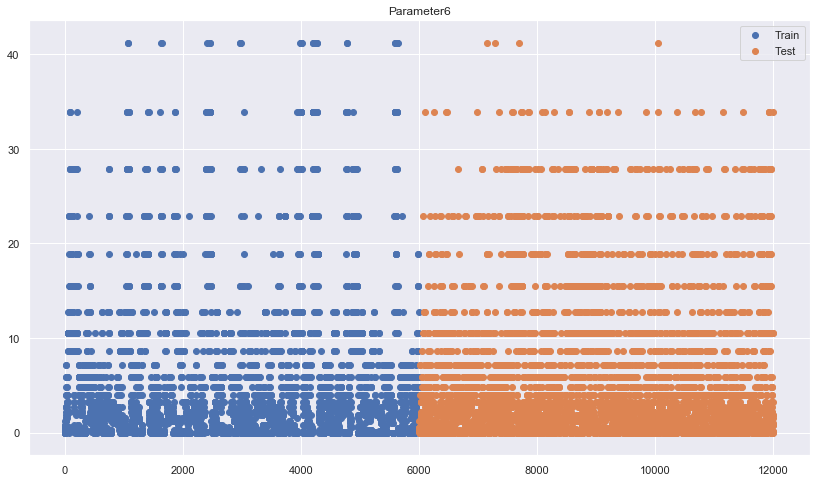

(6000, 11)


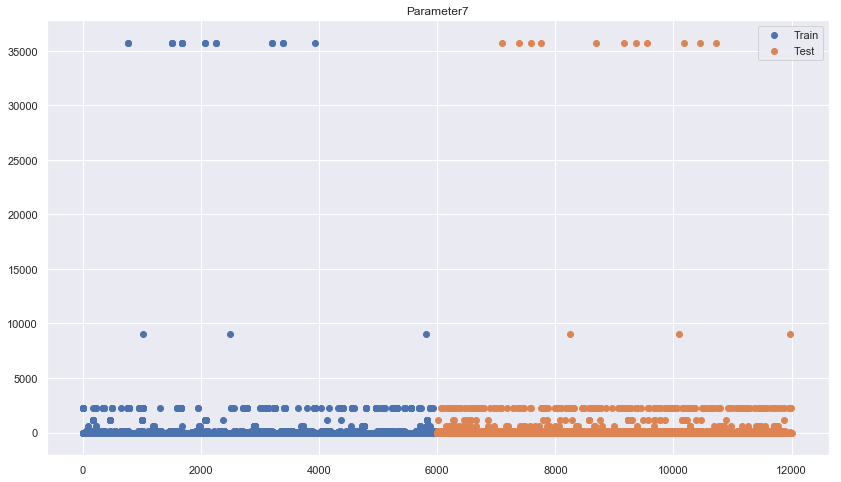

(6000, 11)


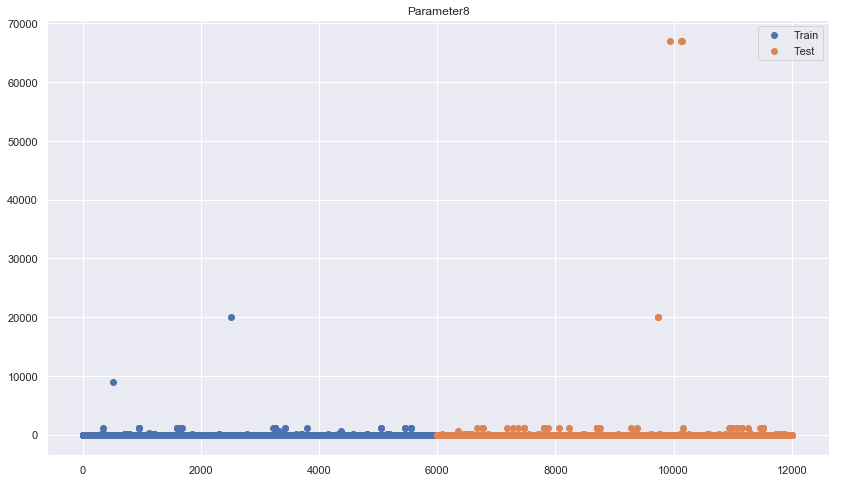

(6000, 11)


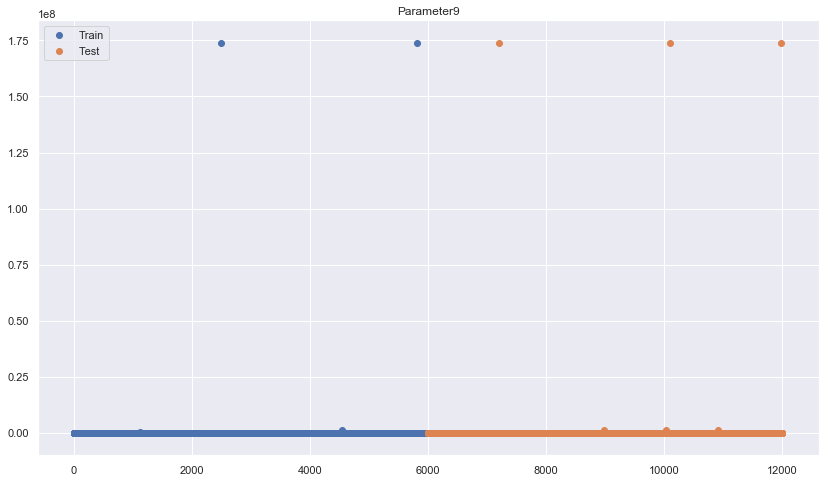

(6000, 11)


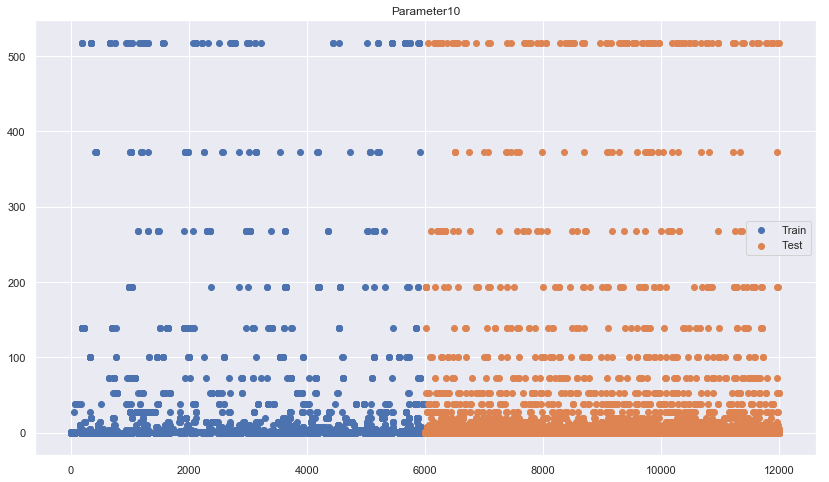

(6000, 11)


In [63]:
for i in ['Parameter' + str(i) for i in range(1,11)]:
    plt.figure(figsize=(14,8))
    plt.scatter(x=range(len(train)),y=train[i],label='Train')
    plt.scatter(x=range(len(test),len(test)*2),y=test[i],label='Test')
    plt.title(i)
    plt.legend()
    plt.show()

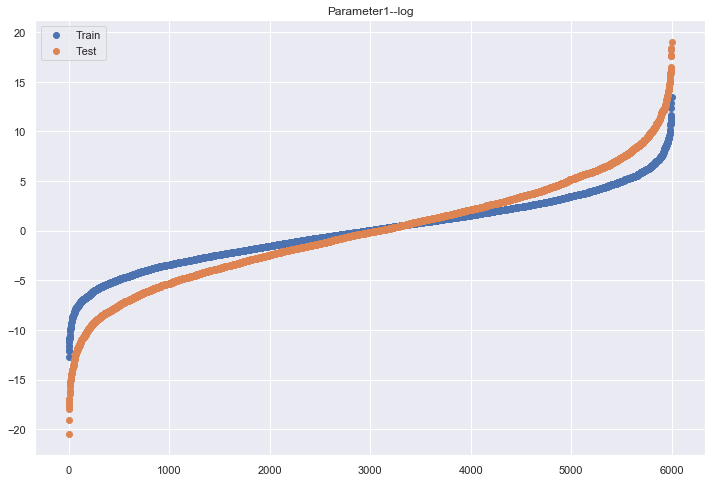

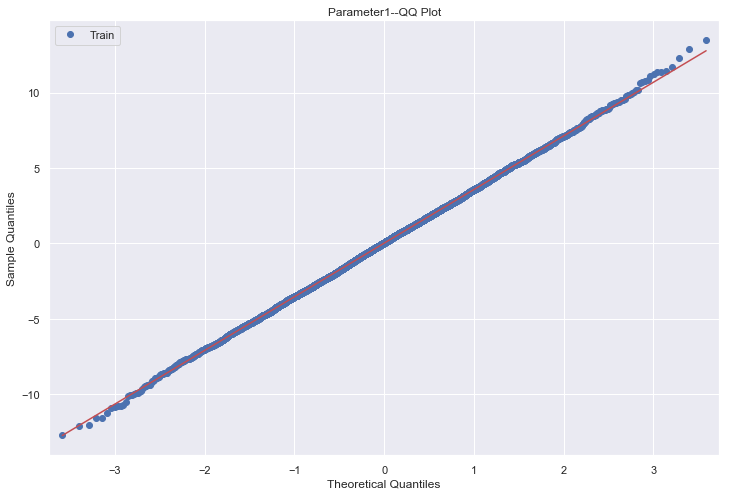

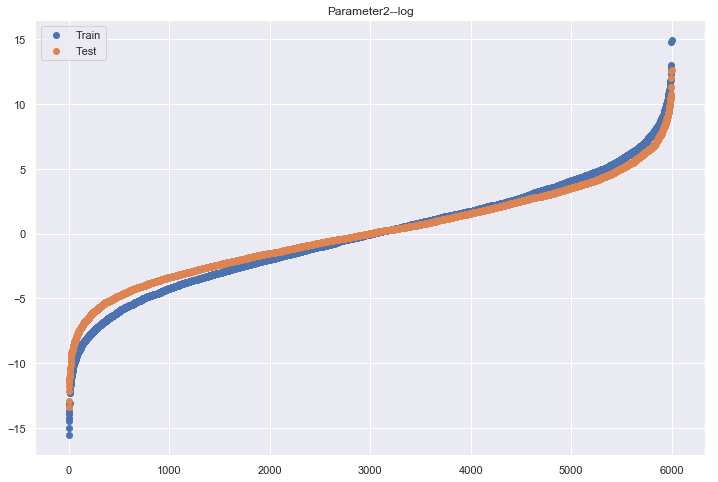

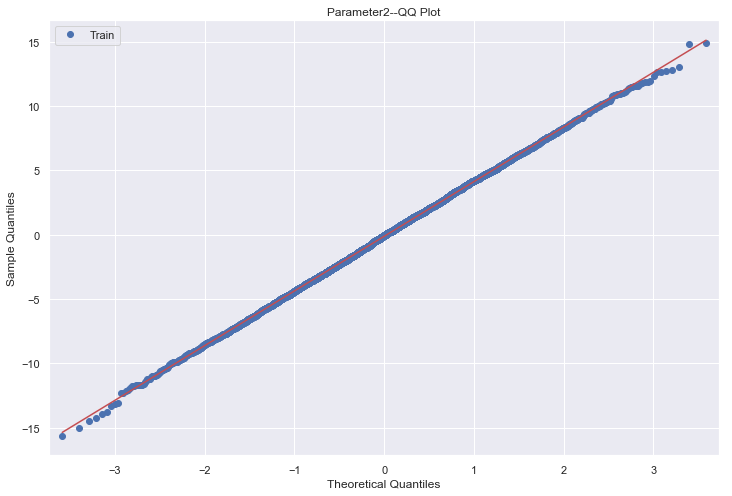

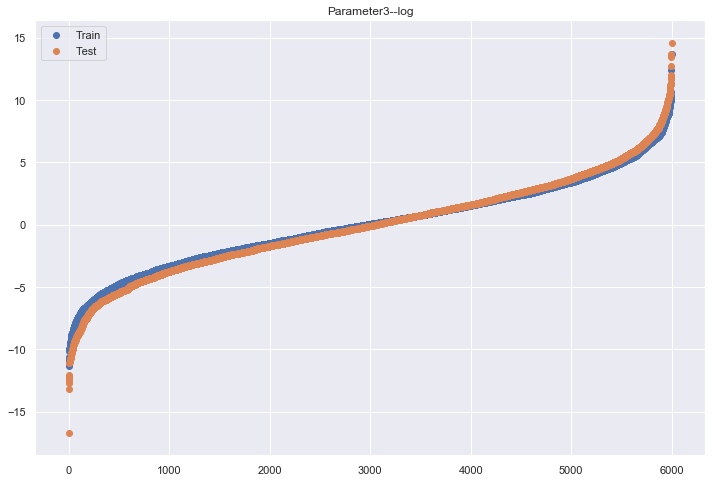

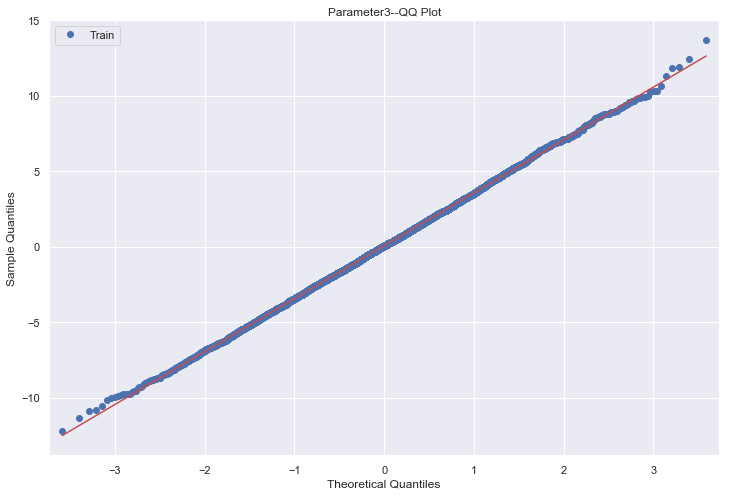

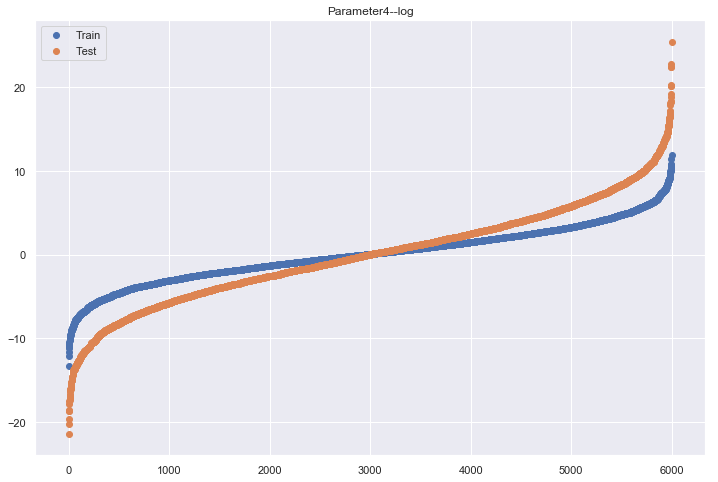

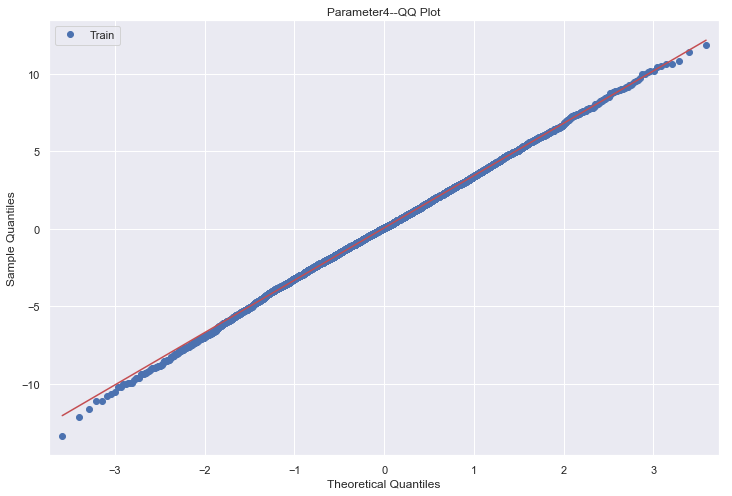

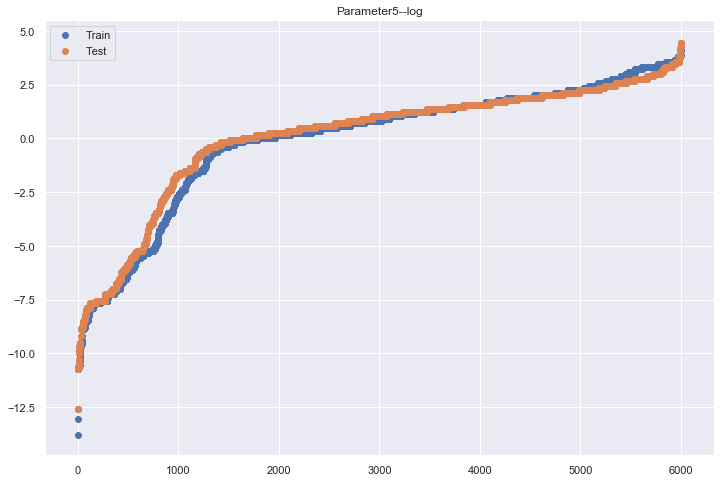

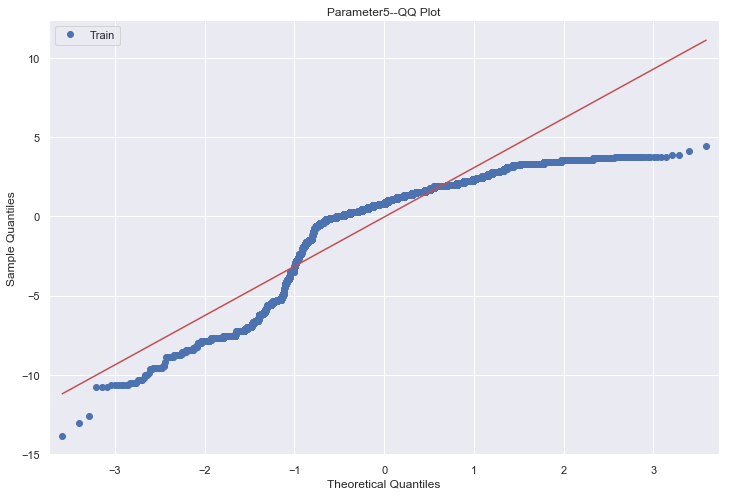

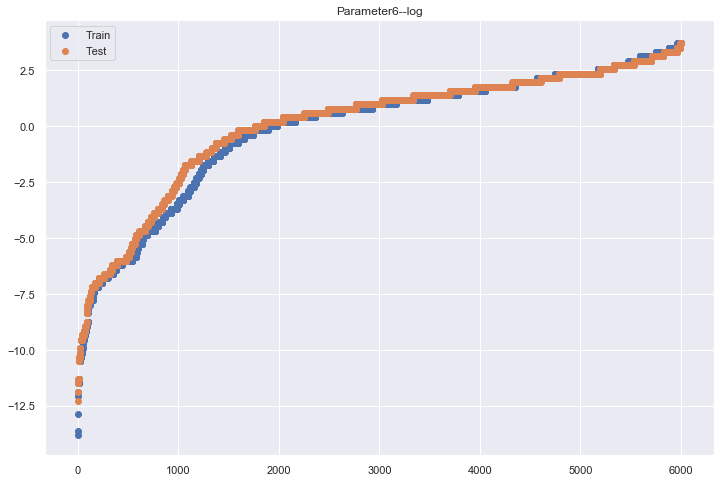

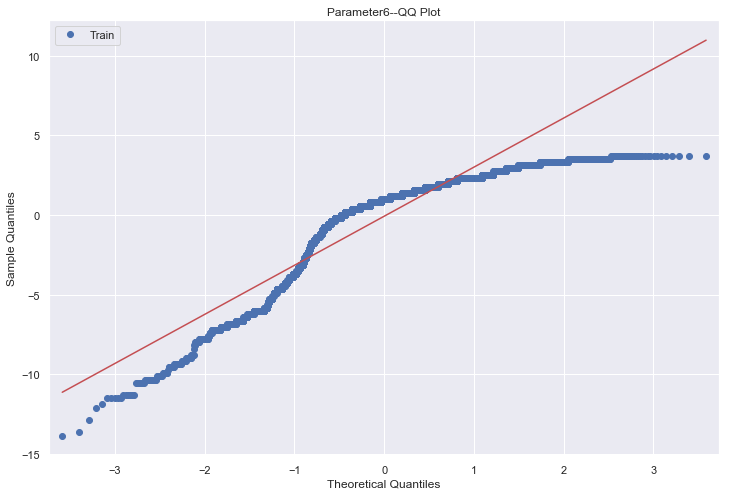

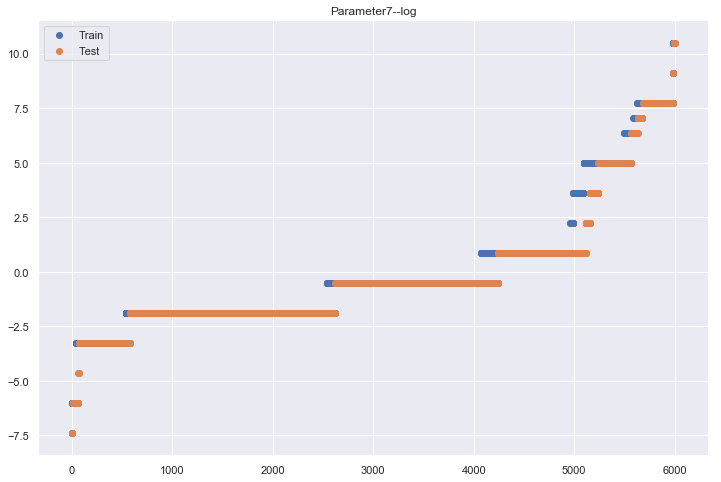

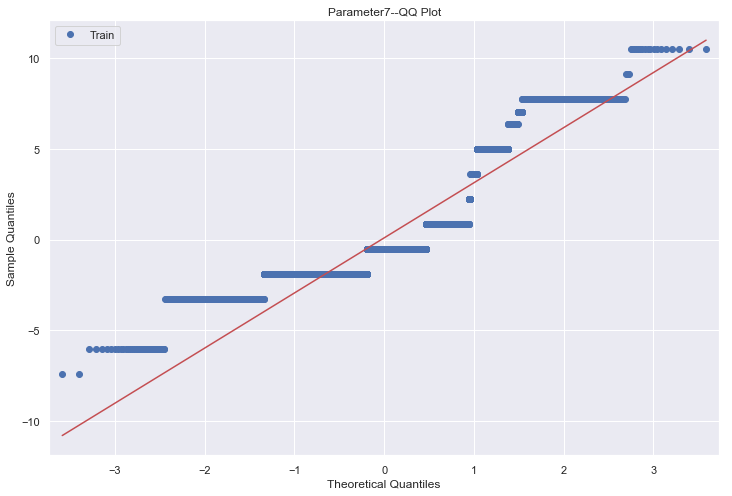

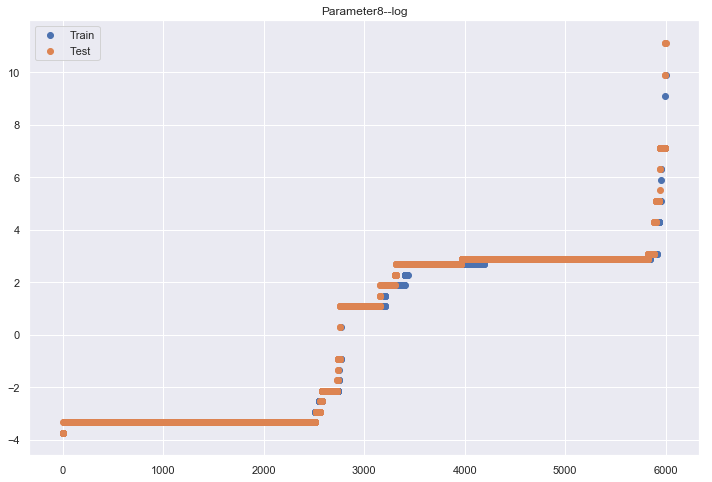

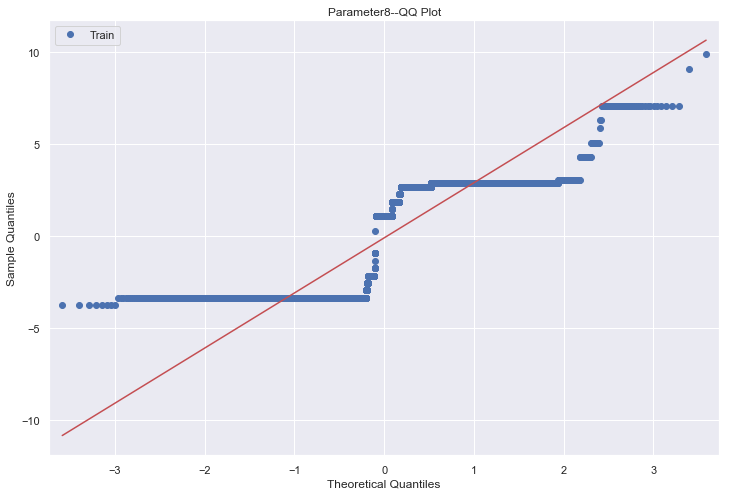

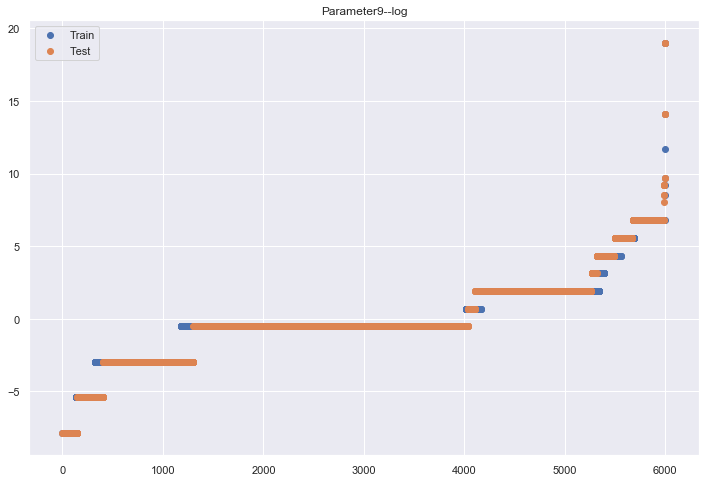

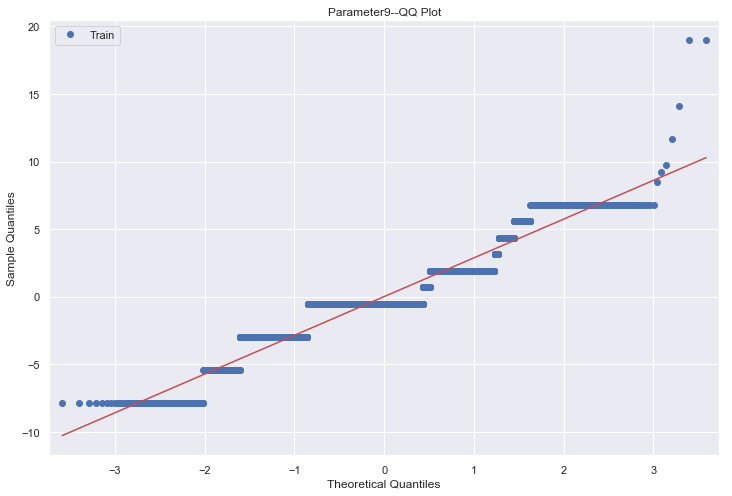

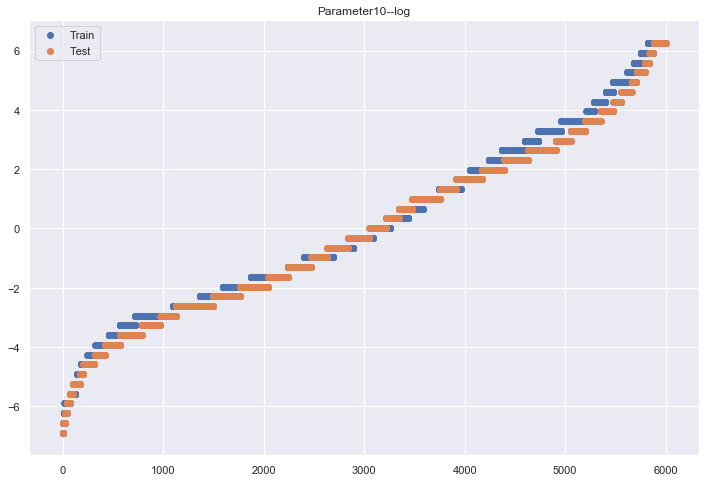

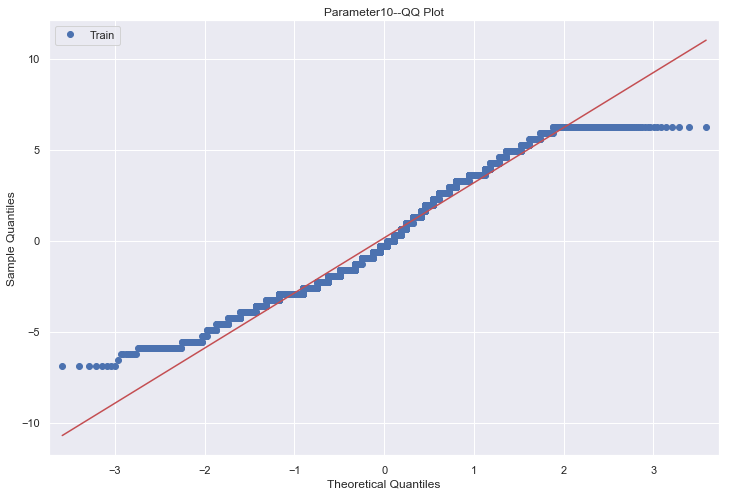

In [69]:
for i in ['Parameter' +str(i) for i in range(1,11)]:
    plt.scatter(x=range(len(train)),y=sorted(np.log(train[i])),label='Train')
    plt.scatter(x=range(len(test)),y=sorted(np.log(test[i])),label='Test')
    plt.title(i + '--log')
    plt.legend()
    plt.show()
    
    sm.qqplot(np.log(train[i]),line='s',label='Train')
    plt.legend()
    plt.title(i + '--QQ Plot')
    plt.show()